# Cats vs Dogs based on handmade ANN

### **Step 0: Import packages**

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from handmade_ANN import *

### **Step 0.5: Preparation**

In [2]:
plt.rcParams['figure.figsize'] = (5.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2
np.random.seed(2)

### Step 1: Load data

In [3]:
train_dataset = h5py.File('datasets/train_catvnoncat.h5','r')
train_x_orig = np.array(train_dataset["train_set_x"][:])
train_y = np.array(train_dataset["train_set_y"][:])
test_dataset = h5py.File('datasets/test_catvnoncat.h5','r')
test_x_orig = np.array(test_dataset["test_set_x"][:])
test_y= np.array(test_dataset["test_set_y"][:])
classes = np.array(test_dataset["list_classes"][:])
train_y = train_y.reshape((1,train_y.shape[0]))
test_y = test_y.reshape((1,test_y.shape[0]))

y = 1


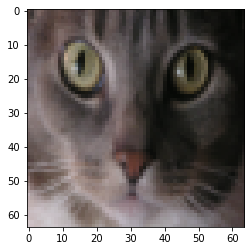

In [4]:
# Example of a image
index = 60
plt.imshow(train_x_orig[index])
print("y = "+str(train_y[0,index]))

In [5]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]
print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [6]:
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T/255.
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T/255.
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


### **Step 2: Fit model**

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.674091
Cost after iteration 200: 0.662514
Cost after iteration 300: 0.655446
Cost after iteration 400: 0.651107
Cost after iteration 500: 0.648427
Cost after iteration 600: 0.646764
Cost after iteration 700: 0.645727
Cost after iteration 800: 0.645078
Cost after iteration 900: 0.644670
Cost after iteration 1000: 0.644414
Cost after iteration 1100: 0.644252
Cost after iteration 1200: 0.644150
Cost after iteration 1300: 0.644086
Cost after iteration 1400: 0.644045
Cost after iteration 1500: 0.644019
Cost after iteration 1600: 0.644002
Cost after iteration 1700: 0.643992
Cost after iteration 1800: 0.643985
Cost after iteration 1900: 0.643981


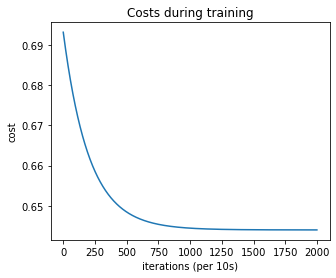

In [7]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
parameters = model(train_x, train_y, layers_dims, n_iterations=2000, print_cost=True)

### **Step 3: Prediction & Visualization**

In [8]:
pred_y = predict(test_x, test_y, parameters)

Accuracy: 0.3400000000000001


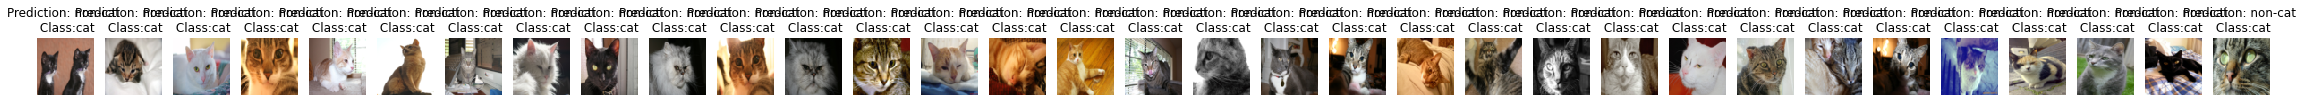

In [9]:
a = pred_y + test_y
mislabeled_indices = np.asarray(np.where(a == 1))
plt.rcParams['figure.figsize'] = (40.0,40.0)
num_images = len(mislabeled_indices[0])
for i in range(num_images):
    index = mislabeled_indices[1][i]
    plt.subplot(2,num_images,i+1)
    plt.imshow(test_x[:,index].reshape(64,64,3),interpolation='nearest')
    plt.axis('off')
    plt.title("Prediction: " + classes[int(pred_y[0,index])].decode("utf-8") + " \n Class:" + classes[test_y[0,index]].decode("utf-8"))